In [1]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import silhouette_score

This code is submitted as part of project 2 for the subject COMP90037 (Security Analytics) at the University of  Melbourne .
     
    -------------------------------------------
    COMP90037 Security Analytics - Project 2 
    Machine learning based Threat detection

    Author : Mohammed Ahsan Kollathodi 
    Student id: 1048942.
    

K-means Clustering Algorithm  : 
---------------------------------------------------------------

The K-means clustering is one of the simple and popular unsupervised machine learning algorithms. The Objective of K-Means is very simple which is to group similar data points together and discover the underlying patterns. To acheive this objective, the K-Means would look for a fixed number (k) of clusters in the dataset. 

A cluster refers to a collection of data points aggregated together because of certain similarities. 

To process the learning data, the K-means algorithm in data mining starts with a first group of randomly selected centroids, which are used as the beginning points for every cluster, and then performs iterative (repetitive) calculations to optimize the positions of the centroids

It halts creating and optimizing clusters when either:

- The centroids have stabilized — there is no change in their values because the clustering has been successful.

- The defined number of iterations has been achieved.

Feature selection was done initially after the process of data cleaning through the method of PCA or principal component analysis. 

PCA or the principal component Analysis is a dimensionality reduction method that is often used to reduce the dimensionality of large data sets 
by transforming a large set of variables into a smaller one that would 
still consist of the most of the information that is present in the larger set. 

reference : https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1


### Train data 

In [3]:
pd_train = pd.read_csv('train_data_with_PCA_A1.csv' , sep=',')

In [5]:
# We define the number of clusters in the range of 1,10 or k here. 
SSE = []
for k in range(1, 10):
    # Initialise a new kmeans classifiers with k number of clusters.
    kmeans = KMeans(n_clusters=k)
    # Fit the train values to the model. 
    kmeans.fit(pd_train.values)
    SSE.append(kmeans.inertia_)

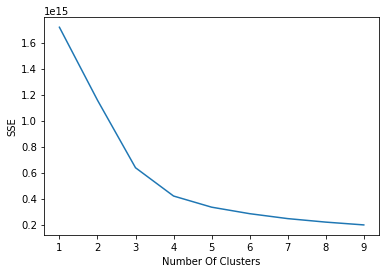

In [7]:
plt.plot(range(1, 10), SSE)
plt.xticks(range(1, 10))
plt.xlabel("Number Of Clusters:")
plt.ylabel("SSE:")
plt.show()

In [8]:
# K_means with 3 number of clusters.
K_means = KMeans(n_clusters=3, random_state=0)
K_means.fit(pd_train.values)

KMeans(n_clusters=3, random_state=0)

### Test data 

In [23]:
pd_test = pd.read_csv('test_data_with_PCA_A1.csv', sep=',')

In [24]:
predict_test = K_means.predict(pd_test)

In [25]:
pd_test['CLUSTER'] = predict_test
pd_test['CLUSTER'].value_counts()

0    179729
1    168583
2       165
Name: CLUSTER, dtype: int64

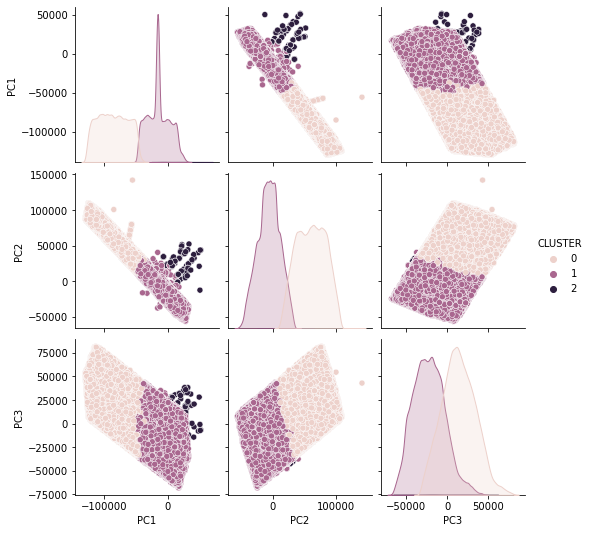

In [26]:
# produce pair-plot 
sns.pairplot(pd_test, hue = 'CLUSTER')

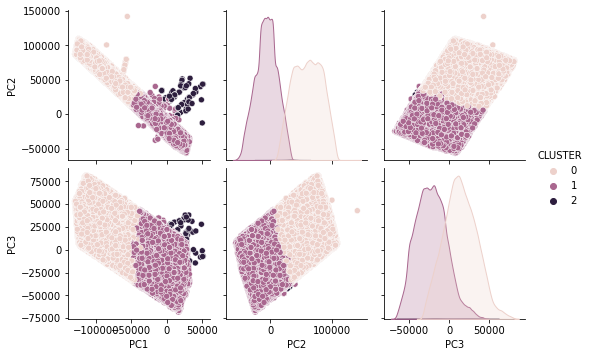

In [29]:
# pair-plot
sns.pairplot(
    pd_test, hue = 'CLUSTER',
    x_vars=["PC1", "PC2", "PC3"],
    y_vars=["PC2", "PC3"],
)

In [30]:
pd_test.shape

(348477, 4)

In [14]:
test_original = pd.read_csv('testdata_cleaned.csv', sep=',')

In [15]:
test_original.shape

(348477, 17)

In [16]:
test_original['CLUSTER'] = predict_test

In [17]:
test_original.head()

,timestamp,duration,protocol,src_ip,src_port,direction,dst_ip,dst_port,state,srctype_service,dsttype_service,num_total_packets,total_bytes,src_bytes,packets_in_Sec,bytes_total_in_Sec,Source_Bytes_Sec,CLUSTER
0,2021-08-15 18:01:29.175156,2752.193853,udp,74.225.127.74,60623,<->,150.35.87.62,63550,CON,0.0,0.0,3,431,288,0.001090,0.156602,0.104644,0
1,2021-08-15 18:01:42.659892,1846.957653,udp,81.237.57.248,51413,<->,150.35.87.62,63549,CON,0.0,0.0,2,421,270,0.001083,0.227942,0.146186,0
2,2021-08-15 18:01:44.669650,2079.032483,udp,34.150.123.142,63197,<->,150.35.87.62,63549,CON,0.0,0.0,1,290,145,0.000481,0.139488,0.069744,0
3,2021-08-15 18:15:52.811230,1533.286882,udp,121.8.38.67,39112,<->,150.35.87.62,63552,CON,0.0,0.0,2,289,145,0.001304,0.188484,0.094568,1
4,2021-08-15 18:24:13.357670,71.863629,udp,85.42.5.252,41912,<->,150.35.87.62,43085,CON,0.0,0.0,23753,24213065,507942,330.528814,336930.731094,7068.137364,0


In [33]:
anomalies_feat_original = test_original.loc[test_original['CLUSTER'].isin([1,2])]

In [32]:
anomalies_feat_original['CLUSTER'].value_counts() # Cluster corresponding to the number of anomalies in the sample. 

1    168583
2       165
Name: CLUSTER, dtype: int64

In [34]:
anomalies_feat_original['src_ip'].nunique()

92369

In [35]:
import numpy as np
anomalies_feat_original.loc[anomalies_feat_original['packets_in_Sec'] != np.inf].describe().apply(lambda s: s.apply(lambda x: format(x, 'g')))

,duration,src_port,dst_port,srctype_service,dsttype_service,num_total_packets,total_bytes,src_bytes,packets_in_Sec,bytes_total_in_Sec,Source_Bytes_Sec,CLUSTER
count,152931,152931,152931,152902,125831,152931,152931,152931,137189,152931,152925,152931
mean,459.974,31813.9,30996.7,0.00430995,0.000143049,40.8784,25653.4,10748.9,1209.29,inf,inf,1.00095
std,991.883,19881.4,3.08182e+06,0.107658,0.0207155,3618.04,2.92239e+06,787067,5333.98,nan,nan,0.0308832
min,0,0,0,0,0,0,59,0,0,0.043934,0,1
25%,0.000693289,13845,13360,0,0,1,138,74,0.0499282,36.955,22.8036,1
50%,0.00100583,31709,13362,0,0,2,482,147,703.777,167807,77147.4,1
75%,34.2602,49945.5,13365,0,0,4,1062,560,1748.37,406548,116141,1
max,3647.21,65537,5.39024e+08,3,3,1.19599e+06,1.06155e+09,1.39573e+08,999275,inf,inf,2


In [36]:
anomalies_feat_original.to_csv('test_A1_KMean_PCA_orig_feat.csv', sep=',')